In [ ]:
!cp -r '/content/drive/MyDrive/fine_tuned_model' .
!cp -r '/content/drive/MyDrive/keras-facenet' .

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 56228, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 56228 (delta 137), reused 211 (delta 102), pack-reused 55960
Receiving objects: 100% (56228/56228), 572.24 MiB | 25.85 MiB/s, done.
Resolving deltas: 100% (38745/38745), done.


In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1643829 sha256=ac9d8556b71b9ee6faf75731ea4a1e09b0743a4a75704192eeccca6484e1b7f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-96lgqvv2/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=63ef64e9c74013662624c356d4748adda49ce7a8d7286cfbe36cecc509759e76
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c466221ca6900e3efce2f4ea9c329288808679aecdcb2838d3
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78532 sha256=fe51bfc57e56fc4c5b67df3e85159d7f7ecb9103fe52f04cd4e8c85bb004dfdd
  Stored in directory: /root/.cache/pip/wheels/59/b1/91/f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=8d705f4f5ef4122606f2ed361231ae2294f0508d4a50a7315c85

ERROR: multiprocess 0.70.11.1 has requirement dill>=0.3.3, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.28.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.


In [ ]:
import shutil
shutil.rmtree('/content/archive')

In [ ]:
#Import the required libraries for Object detection infernece
import time
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import six.moves.urllib as urllib
import sys
import tarfile
import zipfile
import random
from collections import defaultdict
from PIL import Image, ImageDraw
from google.colab.patches import cv2_imshow
from keras.models import load_model


%matplotlib inline
# setting min confidence threshold
MIN_CONF_THRESH=.5
#Loading the exported model from saved_model directory
PATH_TO_SAVED_MODEL ='/content/fine_tuned_model2/saved_model'
print('Loading model...', end='')
start_time = time.time()
# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))
# LOAD LABEL MAP DATA
PATH_TO_LABELS='/content/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

Loading model...Done! Took 20.47050404548645 seconds


In [ ]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array of shape (height, width, channels), where channels=3 for RGB to feed into tensorflow graph.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))

**RECOGNITION**

In [ ]:
def extract_face(filename, required_size=(160, 160)):
  image = Image.open(filename)
  image = image.convert('RGB')
  (im_width, im_height) = image.size
  image_np = load_image_into_numpy_array(filename)
  input_tensor = tf.convert_to_tensor(image_np)
  input_tensor = input_tensor[tf.newaxis, ...]
  detections = detect_fn(input_tensor)
  ymin, xmin, ymax, xmax = detections['detection_boxes'][0][0]
  x1, x2, y1, y2 = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)
  pixels = np.asarray(image)
  x1, y1 ,x2, y2= x1.numpy().astype(int), y1.numpy().astype(int), x2.numpy().astype(int), y2.numpy().astype(int)
  # print(y1, y2, x1, x2)
  face = pixels[y1:y2, x1:x2]
  image = Image.fromarray(face)
  image = image.resize(required_size)
  face_array = np.asarray(image)
  return(face_array)

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
   creating: archive/
   creating: archive/data/
   creating: archive/data/train/
   creating: archive/data/train/ben_afflek/
  inflating: archive/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: archive/data/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: archive/data/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: archive/data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: archive/data/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: archive/data/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: archive/data/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: archive/data/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGa

Done! Took 53.29751968383789 miliseconds
1 (160, 160, 3)


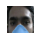

Done! Took 63.05122375488281 miliseconds
2 (160, 160, 3)


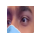

Done! Took 135.209321975708 miliseconds
3 (160, 160, 3)


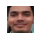

Done! Took 32.224416732788086 miliseconds
4 (160, 160, 3)


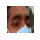

Done! Took 30.648231506347656 miliseconds
5 (160, 160, 3)


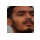

Done! Took 455.3349018096924 miliseconds
6 (160, 160, 3)


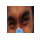

Done! Took 56.82706832885742 miliseconds
7 (160, 160, 3)


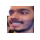

Done! Took 404.8609733581543 miliseconds
8 (160, 160, 3)


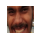

Done! Took 727.8842926025391 miliseconds
9 (160, 160, 3)


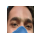

Done! Took 490.0186061859131 miliseconds
10 (160, 160, 3)


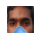

Done! Took 41.834115982055664 miliseconds
11 (160, 160, 3)


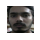

Done! Took 126.65629386901855 miliseconds
12 (160, 160, 3)


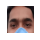

Done! Took 737.424373626709 miliseconds
13 (160, 160, 3)


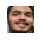

Done! Took 469.62666511535645 miliseconds
14 (160, 160, 3)


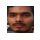

In [ ]:
folder = "/content/archive/data/train_masked/me/"
i = 1
for filename in os.listdir(folder):
  path = folder + filename
  start_time = time.time()
  face = extract_face(path)
  end_time = time.time()
  elapsed_time = end_time - start_time
  print('Done! Took {} miliseconds'.format(elapsed_time*1000))
  print(i,face.shape)
  plt.subplot(7,7,i)
  plt.axis("off")
  plt.imshow(face)
  i+=1
  plt.show()  

In [ ]:
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in os.listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces

In [ ]:
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in os.listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not os.path.isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return np.asarray(X), np.asarray(y)

In [ ]:
trainX, trainy = load_dataset('/content/archive/data/train_masked/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/archive/data/val_masked/')
print(testX.shape, testy.shape)
# save arrays to one file in compressed format
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

>loaded 42 examples for class: mindy_kaling
>loaded 42 examples for class: jerry_seinfeld
>loaded 30 examples for class: elton_john
>loaded 26 examples for class: ben_afflek
>loaded 14 examples for class: me
>loaded 36 examples for class: madonna
(190, 160, 160, 3) (190,)
>loaded 13 examples for class: mindy_kaling
>loaded 10 examples for class: jerry_seinfeld
>loaded 10 examples for class: elton_john
>loaded 12 examples for class: ben_afflek
>loaded 10 examples for class: madonna
(55, 160, 160, 3) (55,)


In [ ]:
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = np.expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]

In [ ]:
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
model_emb = load_model('/content/keras-facenet/model/facenet_keras.h5')
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model_emb, face_pixels)
	newTrainX.append(embedding)
newTrainX = np.asarray(newTrainX)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model_emb, face_pixels)
	newTestX.append(embedding)
newTestX = np.asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
np.savez_compressed('5-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (190, 160, 160, 3) (190,) (55, 160, 160, 3) (55,)
Loaded Model
(55, 128)


In [ ]:
data = np.load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

Dataset: train=190, test=55


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

In [ ]:
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

In [ ]:
model = SVC(kernel='linear', probability = True)
model.fit(trainX, trainy)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))flask-object-detection

Accuracy: train=93.158, test=81.818


Elapsed time: 0.5848407745361328 miliseconds
Predicted: jerry_seinfeld (82.107)
Expected: jerry_seinfeld


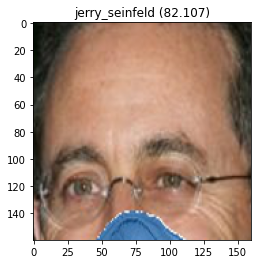

In [ ]:
data = np.load('5-celebrity-faces-dataset.npz')
testX_faces = data['arr_2']
# test model on a random example from the test dataset
selection = random.choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = np.expand_dims(random_face_emb, axis=0)

start_time = time.time()
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {(elapsed_time)*1000} miliseconds")
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
plt.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

In [ ]:
def show(frame):
  # Running the infernce on the image specified in the  image path
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  image_np = np.array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
  (im_height, im_width, _) = frame.shape
  input_tensor = tf.convert_to_tensor(image_np)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis, ...]
  detections = detect_fn(input_tensor)
  ymin, xmin, ymax, xmax = detections['detection_boxes'][0][0]
  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
  detections['num_detections'] = num_detections
  # detection_classes should be ints.
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
  #print(detections['detection_classes'])
  image_np_with_detections = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=MIN_CONF_THRESH,
        agnostic_mode=False)
  
  x1, x2, y1, y2 = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)
  pixels = image_np
  x1, y1 ,x2, y2= x1.numpy().astype(int), y1.numpy().astype(int), x2.numpy().astype(int), y2.numpy().astype(int)
  face = pixels[y1:y2, x1:x2]
  image = Image.fromarray(face)
  image = image.resize((160, 160))
  face_array = np.asarray(image)

  return (image_np_with_detections, face_array, detections['detection_scores'])

In [ ]:
cap = cv2.VideoCapture('/content/WIN_20210414_19_33_25_Pro.mp4')

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

tt=0
nf=0

out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (frame_width, frame_height))

while(cap.isOpened()):

  # Capture frame-by-frame
  ret, frame = cap.read()
  if frame is None:
    break

  # start_time = time.time()
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  # image_np = np.array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
  start_time = time.time()
  output, face_pixels, score = show(frame)
  if score[0] > 0.5:
    sample = get_embedding(model_emb, face_pixels)
    sample = np.expand_dims(sample, axis=0)
    yhat_class = model.predict(sample)
    yhat_prob = model.predict_proba(sample)
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    predict_names = out_encoder.inverse_transform(yhat_class)
    if class_probability > 50:
      texted_image =cv2.putText(output, text=predict_names[0], org=(50,50),fontFace=3, fontScale=1, color=(0,0,255), thickness=2)
    else:
      texted_image =cv2.putText(output, text='unknown', org=(50,50),fontFace=3, fontScale=1, color=(0,0,255), thickness=2)
  end_time = time.time()

  # end_time = time.time()
  elapsed_time = end_time - start_time
  print('Done! Took {} miliseconds'.format(elapsed_time*1000))

  plt.figure()
  print(class_probability)

  plt.imshow(output)
  plt.show()
  output = cv2.cvtColor(output, cv2.COLOR_RGB2BGR)
  # Saves for video
  out.write(output)

cap.release()
out.release()                 